In [54]:
import os, time
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
%matplotlib inline

from IPython.display import display, HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [55]:
# Create timestamp to show when this summary was run
print 'Summary run: ' + time.strftime("%a, %d %b %Y %H:%M")

Summary run: Wed, 22 Jul 2020 15:35


In [56]:
relative_path = '../../../outputs'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

# Traffic Counts
----
### By Facility Type

In [57]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

In [58]:
_df = df.groupby('@facilitytype').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Freeway,"468,434,826","474,598,766","6,163,940",1.32%
HOV,"1,194,523","1,193,269","-1,254",-0.10%
Principal Arterial,"11,044,380","12,607,908","1,563,528",14.16%
Ramp,"352,596","309,264","-43,332",-12.29%
Total,"481,026,325","488,709,207","7,682,882",1.60%


----
### By County

In [59]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume_county_facility.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

_df = df.groupby('county').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
county,,,,
King,"338,145,881","339,984,624","1,838,743",0.54%
Pierce,"76,929,900","80,849,724","3,919,824",5.10%
Snohomish,"65,950,544","67,874,859","1,924,315",2.92%
Total,"481,026,325","488,709,207","7,682,882",1.60%


----
### Scatterplots 

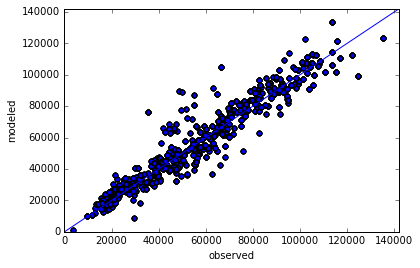

In [60]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

In [61]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print 'r^2: ' + str(r_value)

r^2: 0.952331207239


---
By County

King r^2: 0.962135079906
Pierce r^2: 0.825101810993
Snohomish r^2: 0.966758354655


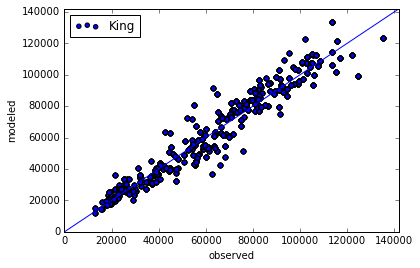

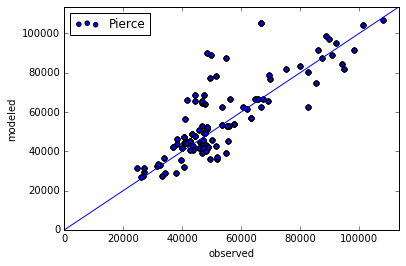

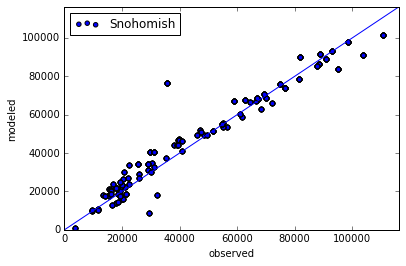

In [62]:
for county in np.unique(df['county']):
    _df = df[df['county'] == county]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=county)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    print str(county) + ' r^2: ' + str(r_value)

---
By Facility Type

r^2 Freeway: 0.941147770022
r^2 Principal Arterial: 0.895535948077


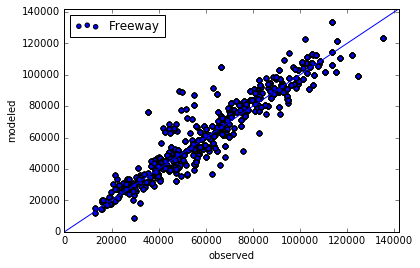

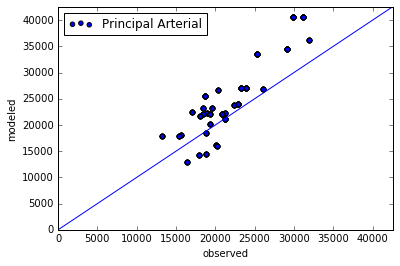

In [63]:
for factype in ['Freeway','Principal Arterial']:
    _df = df[df['@facilitytype'] == factype]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=factype)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    print 'r^2 ' + str(factype) + ': ' + str(r_value)

# Screenlines

In [64]:
df = pd.read_csv(os.path.join(relative_path,'validation','screenlines.csv'))
df = df.append(df.sum(numeric_only=True), ignore_index=True)
df.at[df.index[-1], 'name'] = 'TOTAL'
#df.at['C', 'name'] = 10
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,name,observed,modeled,diff,percent_diff
0,AUBURN - SOUTH KING,"568,417","559,744","-8,673",-1.53%
1,KENT,"550,322","526,101","-24,221",-4.40%
2,SEATTLE - SOUTH OF CBD,"526,500","522,109","-4,391",-0.83%
3,SHIP CANAL,"519,802","571,104","51,302",9.87%
4,KIRKLAND-REDMOND,"414,120","403,442","-10,678",-2.58%
5,MILL CREEK,"400,848","398,000","-2,848",-0.71%
6,SOUTH BELLEVUE,"399,500","363,527","-35,973",-9.00%
7,SEATTLE - NORTH,"372,000","381,072","9,072",2.44%
8,TACOMA - EAST OF CBD,"312,164","337,339","25,175",8.06%
9,PARKLAND,"304,322","283,288","-21,034",-6.91%


r^2 : 0.993067469087


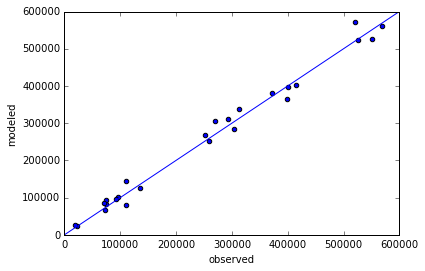

In [65]:
df = df.head(-1)
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print 'r^2 : ' + str(r_value)

# Transit Boarding
----
### By Agency

In [66]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_agency.csv')

df[['observed_5to20','modeled_5to20','diff']] = df[['observed_5to20','modeled_5to20','diff']].astype('float')
df[['perc_diff']] = df[['perc_diff']].applymap(format_percent)
df.sort_values('observed_5to20', ascending=False)

,agency,observed_5to20,modeled_5to20,diff,perc_diff
2,King County Metro,"392,694","415,038","22,344",5.69%
5,Sound Transit,"145,426","163,786","18,360",12.63%
0,Community Transit,"30,918","34,929","4,011",12.97%
4,Pierce Transit,"27,233","35,093","7,860",28.86%
6,Washington Ferries,"16,912","13,771","-3,140",-18.57%
3,Kitsap Transit,"8,669","16,778","8,109",93.53%
1,Everett Transit,"3,290","1,721","-1,569",-47.68%


----
### Key Routes
#### Ferries

In [67]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
df[['observed_5to20','modeled_5to20']] = df[['observed_5to20','modeled_5to20']].astype('float')
_df = df[df['route_code'].isin([5001,5002,5003,5004,5005,5006,5007,1973,1975])].reset_index()
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df

,description,observed_5to20,modeled_5to20,diff,perc_diff
0,POF West Seattle - S,"1,356","1,129",-226,-16.70%
1,POF Vashon Island -,670,66,-603,-90.11%
2,WSF Kingston - Edmon,"1,732",728,"-1,004",-57.99%
3,WSF Bainbridge Islan,"8,857","9,641",785,8.86%
4,WSF Bremerton - Seat,"4,484","1,849","-2,636",-58.78%
5,WSF Fauntleroy - Sou,365,64,-301,-82.42%
6,WSF Vashon Island -,946,832,-114,-12.09%
7,WSF Southworth - Vas,239,378,139,58.44%
8,WSF Point Defiance -,289,280,-9,-2.98%


r^2 : 0.9491997117


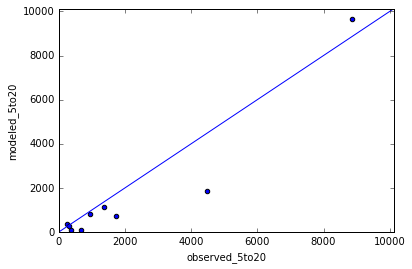

In [68]:
ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
print 'r^2 ' + str('') + ': ' + str(r_value)

#### Bikes on Ferries

In [69]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'bike_ferry_boardings.csv')
df['route_code'] = df['route_code'].astype('int')
df[['route_code','description', '@bvol']].sort_values('@bvol', ascending=False)

,route_code,description,@bvol
0,1973,POF West Seattle - S,948
1,1975,POF Vashon Island -,759
2,4200,POF Seattle - Bremer,672
4,4202,POF Bremerton - Anna,666
3,4201,POF Bremerton - Pt O,630
7,5003,WSF Bremerton - Seat,560
6,5002,WSF Bainbridge Islan,413
8,5005,WSF Vashon Island -,259
9,5006,WSF Southworth - Vas,253
10,5007,WSF Point Defiance -,183


#### Rail

In [70]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
df[['observed_5to20','modeled_5to20']] = df[['observed_5to20','modeled_5to20']].astype('float')
_df = df[df['route_code'].isin([6996,6999,6998])].reset_index()
_df['description'] = _df['route_code'].map({6998: 'Sounder South', 6999: 'Sounder North',6996: 'Link Red Line'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)

_df

,description,observed_5to20,modeled_5to20,diff,perc_diff
0,Link Red Line,"69,383","75,472","6,089",8.78%
1,Sounder South,"15,356","15,506",150,0.98%
2,Sounder North,"1,667","2,029",362,21.73%


r^2 : 0.999817064276


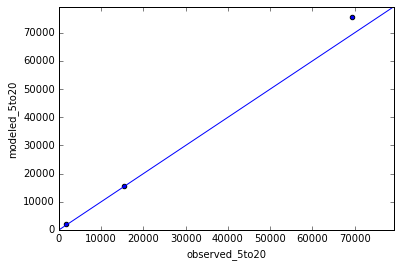

In [71]:
if len(_df) > 0: 
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print 'r^2 ' + str('') + ': ' + str(r_value)

#### RapidRide, Busiest Buses, Streetcar

In [72]:
_df = df[df['route_code'].isin([1671,1672,1673,1674,1675,1676,6550,1007,1040,1997,1998])].reset_index()
_df['description'] = _df['route_code'].map({1671: 'A Line RapidRide', 1672: 'B Line RapidRide',
                                            1673: 'C Line RapidRide', 1674: 'D Line RapidRide',
                                            1675: 'E Line RapidRide', 1676: 'F Line RapidRide',
                                            6550: 'Sound Transit 550', 1040: 'KC Metro 40', 1007: 'KC Metro 7',
                                            1997: 'SLU Streetcar', 1998: 'First Hill Streetcar'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df.sort_values('modeled_5to20', ascending=False)

,description,observed_5to20,modeled_5to20,diff,perc_diff
6,E Line RapidRide,"15,336","14,524",-812,-5.30%
4,C Line RapidRide,"11,368","13,006","1,638",14.41%
1,KC Metro 40,"11,405","12,253",848,7.44%
10,Sound Transit 550,"9,168","11,450","2,282",24.90%
0,KC Metro 7,"10,150","10,469",319,3.14%
5,D Line RapidRide,"13,078","9,559","-3,519",-26.91%
2,A Line RapidRide,"8,522","8,095",-427,-5.01%
7,F Line RapidRide,"5,267","7,180","1,913",36.33%
3,B Line RapidRide,"5,914","6,671",757,12.79%
8,SLU Streetcar,"1,703","1,411",-293,-17.18%


r^2 : 0.913404043042


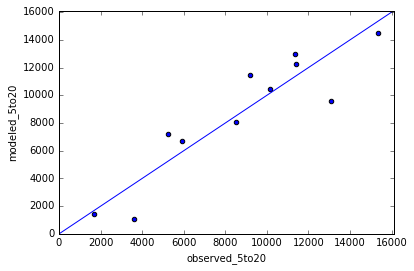

In [73]:
ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
print 'r^2 ' + str('') + ': ' + str(r_value)

---
### Lines by Agency

r^2 Community Transit: 0.896298847668
r^2 Everett Transit: -0.360637522978
r^2 King County Metro: 0.930010159678
r^2 Kitsap Transit: 0.81174208007
r^2 Pierce Transit: 0.865204852851
r^2 Sound Transit: 0.997741148345
r^2 Washington Ferries: 0.947164713639


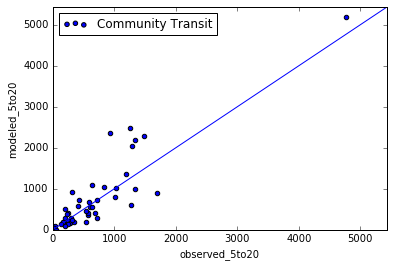

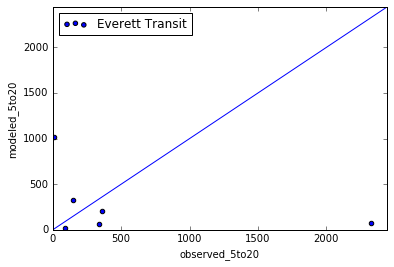

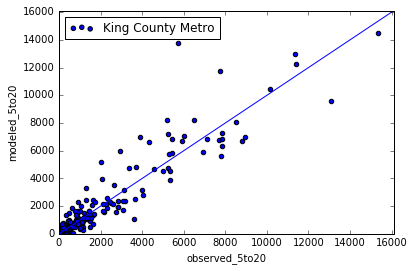

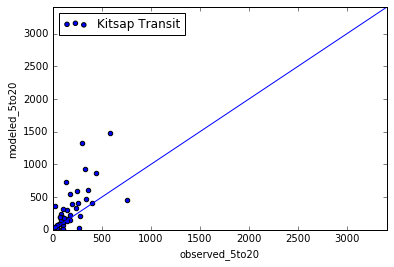

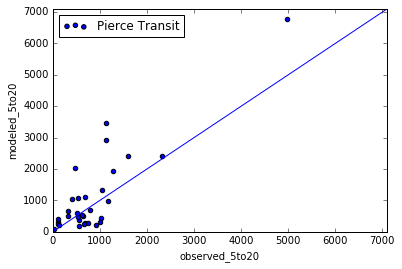

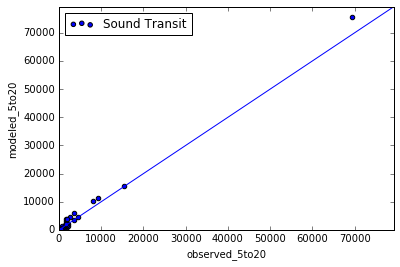

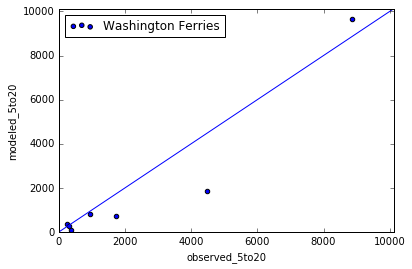

In [74]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_line.csv', index_col='agency')
df = df[-df['agency_id'].isnull()]

for agency in np.unique(df.index):
    _df = df.loc[agency,:]
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20', label=agency)
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print 'r^2 ' + str(agency) + ': ' + str(r_value)

# Light Rail Station Boardings
----
Red Line

In [75]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_boardings.csv', index_col='station_name')
df['diff'] = df['modeled_5to20']-df['observed_5to20']
df['percent_diff'] = df['diff']/df['observed_5to20']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,observed_5to20,modeled_5to20,diff,percent_diff
station_name,,,,
Husky Stadium,"9,416","13,480","4,064",43.16%
Westlake,"10,904","7,474","-3,429",-31.45%
University St,"5,257","6,933","1,676",31.87%
Pioneer Square,"3,865","5,669","1,804",46.68%
Int'l District,"5,647","3,505","-2,143",-37.94%
Capitol Hill,"7,016","7,277",261,3.71%
Stadium,"1,912",844,"-1,068",-55.85%
SODO,"2,108","4,282","2,175",103.19%
Beacon Hill,"2,587","2,220",-367,-14.19%


Sound Transit Station Groupings

In [76]:
df_combined = df.copy()

df_combined['station_group'] = df.index
df_combined.loc[['Westlake'],'station_group'] = 'Westlake/University St'
df_combined.loc[['University St'],'station_group'] = 'Westlake/University St'

df_combined.loc[['Pioneer Square'],'station_group'] = "Pioneer Square/Int'l District"
df_combined.loc[["Int'l District"],'station_group'] = "Pioneer Square/Int'l District"

df_combined.loc[['Stadium'],'station_group'] = 'Stadium/SODO'
df_combined.loc[['SODO'],'station_group'] = 'Stadium/SODO'

df_combined.loc[['Beacon Hill'],'station_group'] = 'Beacon Hill/Mount Baker'
df_combined.loc[['Mount Baker'],'station_group'] = 'Beacon Hill/Mount Baker'

df_combined.loc[['Othello'],'station_group'] = 'Othello/Rainier Beach'
df_combined.loc[['Rainier Beach'],'station_group'] = 'Othello/Rainier Beach'

df_combined = df_combined.groupby('station_group').sum()[['observed_5to20','modeled_5to20']]
df_combined['diff'] = df_combined['modeled_5to20']-df_combined['observed_5to20']
df_combined['percent_diff'] = df_combined['diff']/df_combined['observed_5to20']
df_combined[['percent_diff']] = df_combined[['percent_diff']].applymap(format_percent)

df_combined.loc[['Husky Stadium','Capitol Hill','Westlake/University St',"Pioneer Square/Int'l District",
                 'Stadium/SODO','Beacon Hill/Mount Baker','Columbia City','Othello/Rainier Beach',
                "Tukwila Int'l Blvd",'SeaTac/Airport','Angle Lake']]

,observed_5to20,modeled_5to20,diff,percent_diff
station_group,,,,
Husky Stadium,"9,416","13,480","4,064",43.16%
Capitol Hill,"7,016","7,277",261,3.71%
Westlake/University St,"16,161","14,407","-1,754",-10.85%
Pioneer Square/Int'l District,"9,512","9,174",-339,-3.56%
Stadium/SODO,"4,020","5,127","1,107",27.53%
Beacon Hill/Mount Baker,"4,809","4,674",-136,-2.82%
Columbia City,"2,376","2,720",344,14.48%
Othello/Rainier Beach,"4,412","5,544","1,132",25.66%
Tukwila Int'l Blvd,"2,779","3,616",837,30.12%


# Stop Transfers

### Light Rail

In [77]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_transfers.csv', index_col='station_name')
pd.options.display.float_format = '{:0,.2f}'.format
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,modeled_transfer_rate,observed_transfer_rate,diff,percent_diff
station_name,,,,
Husky Stadium,0.24,-99.00,99.24,-100.25%
Westlake,0.41,0.36,0.05,13.33%
University St,0.62,0.20,0.42,209.20%
Pioneer Square,0.49,0.16,0.33,208.33%
Int'l District,0.72,0.45,0.27,60.12%
Capitol Hill,0.06,-99.00,99.06,-100.06%
Stadium,0.30,0.12,0.18,154.41%
SODO,0.42,0.31,0.11,33.71%
Beacon Hill,0.35,0.35,0.00,0.30%


# Externals

In [78]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'external_volumes.csv', index_col='location')
pd.options.display.float_format = '{:0,.0f}'.format
df = df.drop('diff', axis=1)
df['diff'] = df['modeled']-df['observed']
df = df.fillna(0)
df.loc['Total',['observed','modeled','diff']] = df[['observed','modeled','diff']].sum()
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)

df[['external_station']] = df[['external_station']].applymap('{:0.0f}'.format)
df.replace('nan', '', regex=True)

,external_station,observed,modeled,diff,percent_diff
location,,,,,
I-5 to Olympia,3733,"130,000","133,579","3,579",2.75%
I-5 to Mount Vernon,3744,"67,000","60,173","-6,827",-10.19%
I-90 @ Snoqualmie Pass,3739,"33,000","30,634","-2,366",-7.17%
SR-532 to Camano Island,3746,"23,000","20,905","-2,095",-9.11%
SR-507 to Yelm,3734,"23,000","20,745","-2,255",-9.80%
SR-3 to Belfair,3749,"18,000","17,228",-772,-4.29%
Hood Canal Bridge,3748,"18,000","17,190",-810,-4.50%
SR-530 N/O Stanwood,3745,"9,100","8,681",-419,-4.60%
Mukilteo-Clinton Ferry,3747,"6,300","6,336",36,0.58%


# Corridor Speed

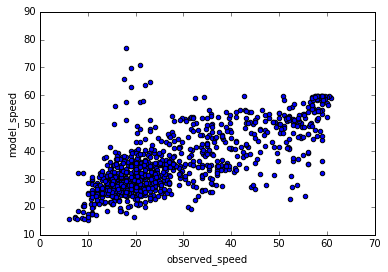

In [79]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
df.plot(kind='scatter', y='model_speed', x='observed_speed')

### AM Peak, Primary Corridors

In [80]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '7to8'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
7,Seattle to Everett - NB,45,58
16,Everett to Seattle - SB,25,28
25,Tacoma to Seattle - NB,25,26
34,Seattle to Tacoma - SB,44,59
43,Bellevue to Lynnwood - NB,49,56
52,Lynnwood to Bellevue - SB,24,24
61,Tukwila to Bellevue - NB,27,19
70,Bellevue to Tukwila - SB,27,44
79,Auburn to Renton - NB,27,24
88,Renton to Auburn - SB,52,55


### PM Peak, Primary Corridors

In [81]:

df[df['tod'] == '16to17'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
2,Seattle to Everett - NB,26,24
11,Everett to Seattle - SB,41,28
20,Tacoma to Seattle - NB,42,42
29,Seattle to Tacoma - SB,29,27
38,Bellevue to Lynnwood - NB,27,24
47,Lynnwood to Bellevue - SB,44,41
56,Tukwila to Bellevue - NB,28,32
65,Bellevue to Tukwila - SB,28,20
74,Auburn to Renton - NB,51,44
83,Renton to Auburn - SB,29,32
